In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import scipy
import sklearn

In [3]:
noise_data = pd.read_csv("../Data/hourly_noisedata_2022.csv", header = 0, sep=',')
noise_data = noise_data[noise_data["description"] == "MP 03: Naamsestraat 62 Taste"]
noise_data.head()
#Just location 3 for now

,month,day,hour,description,lamax,laeq
0,1,1,0,MP 03: Naamsestraat 62 Taste,60.322528,57.126833
4,1,1,1,MP 03: Naamsestraat 62 Taste,53.033583,50.853806
8,1,1,2,MP 03: Naamsestraat 62 Taste,52.173702,50.049903
12,1,1,3,MP 03: Naamsestraat 62 Taste,50.821311,48.964907
16,1,1,4,MP 03: Naamsestraat 62 Taste,49.134851,47.285893


In [11]:
noise_seriesmax = pd.Series(noise_data['lamax'])
noise_serieseq = pd.Series(noise_data['laeq'])
#eq might be more informative

Max noise per hour

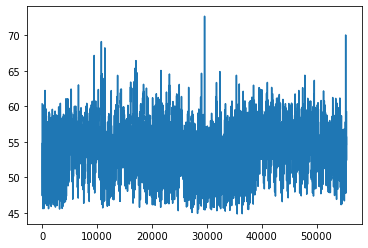

In [12]:
plt.plot(noise_seriesmax)
plt.show()

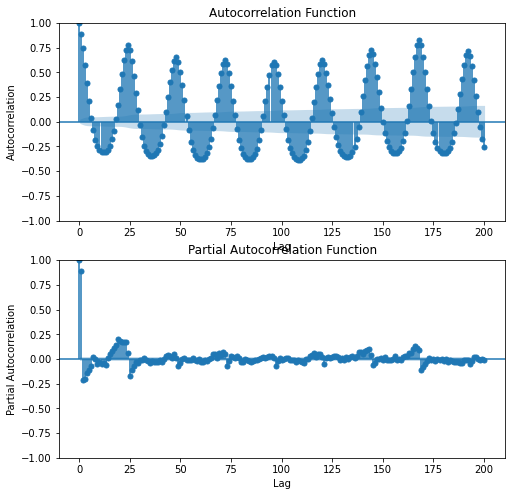

In [16]:
lags = 200
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(noise_seriesmax, ax=ax1, lags=lags)
ax1.set(title='Autocorrelation Function', xlabel='Lag', ylabel='Autocorrelation')

plot_pacf(noise_seriesmax, ax=ax2, lags=lags)
ax2.set(title='Partial Autocorrelation Function', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()
#Clear seasonality over 24 hours again

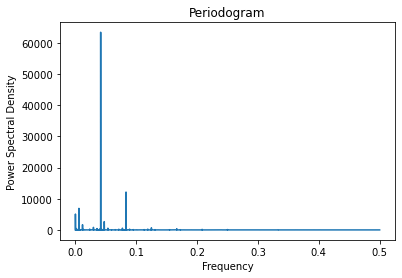

In [15]:
freq, power = scipy.signal.periodogram(noise_seriesmax)
plt.plot(freq, power)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()
#Spike at 1/24 with one harmonic

<function matplotlib.pyplot.show(close=None, block=None)>

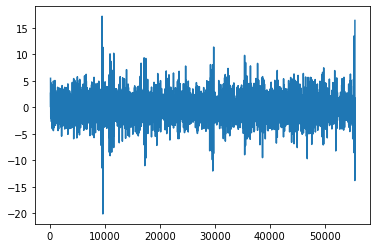

In [22]:
dnoise_seriesmax = noise_seriesmax.diff(24).diff().dropna()
plt.plot(dnoise_seriesmax)
plt.show

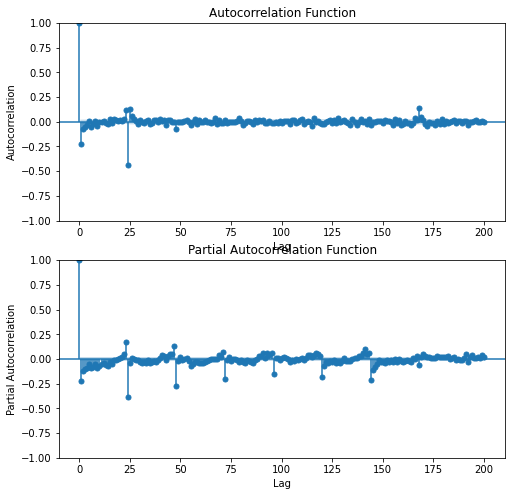

In [23]:
lags = 200
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(dnoise_seriesmax, ax=ax1, lags=lags)
ax1.set(title='Autocorrelation Function', xlabel='Lag', ylabel='Autocorrelation')

plot_pacf(dnoise_seriesmax, ax=ax2, lags=lags)
ax2.set(title='Partial Autocorrelation Function', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()
#Weekly autocorrelation at 168 hours

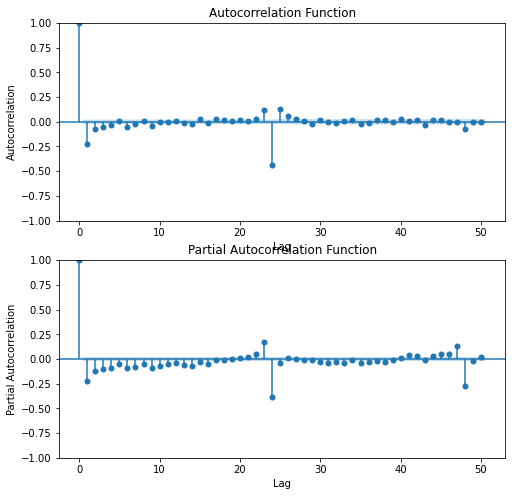

In [24]:
lags = 50
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(dnoise_seriesmax, ax=ax1, lags=lags)
ax1.set(title='Autocorrelation Function', xlabel='Lag', ylabel='Autocorrelation')

plot_pacf(dnoise_seriesmax, ax=ax2, lags=lags)
ax2.set(title='Partial Autocorrelation Function', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()
#In short term, SARIMA with seasonal AR terms at s=24?

Avg noise per hour

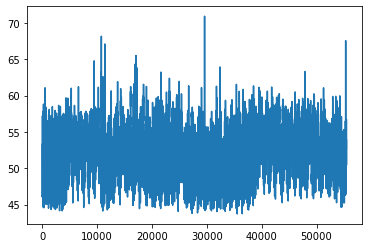

In [25]:
plt.plot(noise_serieseq)
plt.show()

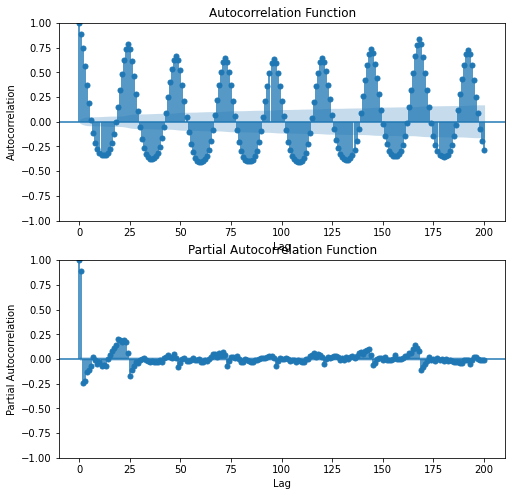

In [29]:
lags = 200
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(noise_serieseq, ax=ax1, lags=lags)
ax1.set(title='Autocorrelation Function', xlabel='Lag', ylabel='Autocorrelation')

plot_pacf(noise_serieseq, ax=ax2, lags=lags)
ax2.set(title='Partial Autocorrelation Function', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()
#Same story with seasonality

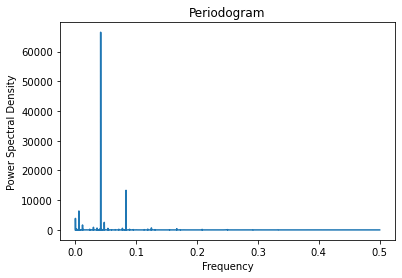

In [27]:
freq, power = scipy.signal.periodogram(noise_serieseq)
plt.plot(freq, power)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram')
plt.show()
#Spike at 1/24 with one harmonic

<function matplotlib.pyplot.show(close=None, block=None)>

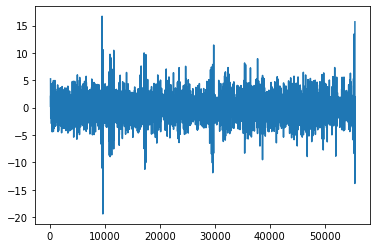

In [30]:
dnoise_serieseq = noise_serieseq.diff(24).diff().dropna()
plt.plot(dnoise_serieseq)
plt.show

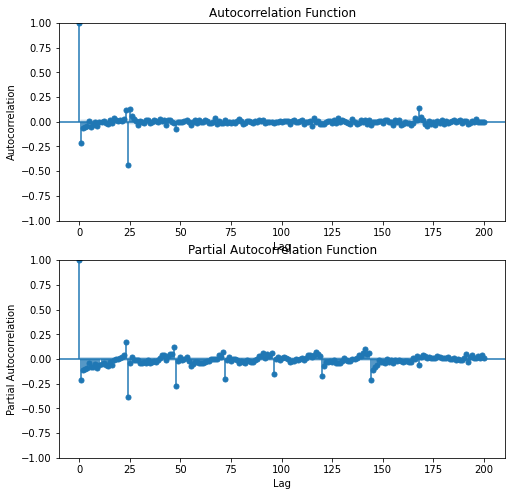

In [31]:
lags = 200
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(dnoise_serieseq, ax=ax1, lags=lags)
ax1.set(title='Autocorrelation Function', xlabel='Lag', ylabel='Autocorrelation')

plot_pacf(dnoise_serieseq, ax=ax2, lags=lags)
ax2.set(title='Partial Autocorrelation Function', xlabel='Lag', ylabel='Partial Autocorrelation')
plt.show()